# Unravelling the Human Interaction with Generative AI-Based Decision Support in Healthcare

### CAS ADS Module 3 by Mayra Spizzo and Salomé Wittwer

![Title image](TitleImage.jpg)

## Introduction

![Intro1](Intro1.jpg)
![Intro2](Intro2.jpg)
![Intro3](Intro3.jpg)

## Data Collection and Description


*   An experiment is conducted in which participants have to solve two patient cases (i.e., generate a diagnosis for a patient). Participants are split into two groups: 
    * Group 1: chat with ChatGPT as a support to solve the patient case
    * Group 2: chat with a human expert (i.e., a physician) as a partner to solve the case

*   Participation:
    * possible for all medical students at the Charité Medical School in Berlin that are in the fourth year of their studies (N = 640)
    * at least 18 years old
    * have given their written consent for participation
    * data collection between 22 April, 2024 until 6 October, 2024

*   The medical students are given two diagnostic tasks that are presented in random order. The patient cases in each of the two diagnostic tasks are based on real emergency cases.

*   Participants are randomly assigned to one condition (i.e., either to the human expert or ChatGPT). To solve the diagnostic task, they can chat with their assigned assistant in real time (i.e., a human coach or ChatGPT). During the assignment, all clicks, noted differential diagnoses, and chat interactions are logged with timestamps

![Procedure](Procedure.jpg)
![Chat Environment](ScreenshotChatroom.jpg)


In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt


## Descriptive Statistics

Based on the data collection process, the following data for each participant is collected:
*   duration of the exchange with the expert (for both ChatGPT and human expert)
*   number of interactions with respective expert
*   categorization of interaction (technical question, request, statement, diagnosis exclusion)
*   patient background info reviewed by the med student
 


In [2]:
# load data
df = pd.read_csv("Daten_Experiment.csv", sep=';')


In [3]:
# data set overview
#get variables
n_participants = df['Id'].nunique()
human_interaction = df['Condition'].value_counts()['Human']
gpt_interaction = df['Condition'].value_counts()['GPT']
time_per_patient = df['TimePatientSeconds'].mean()
time_per_patient_human = df[df['Condition'] == 'Human']['TimePatientSeconds'].mean()
time_per_patient_gpt = df[df['Condition'] == 'GPT']['TimePatientSeconds'].mean()
amount_interaction = df['AmountInteraction'].mean()
amount_interaction_gpt = df[df['Condition'] == 'GPT']['AmountInteraction'].mean()
amount_interaction_human = df[df['Condition'] == 'Human']['AmountInteraction'].mean()
amount_patient_ratio = df['AmountPatientRatio'].mean()


In [4]:
from IPython.display import Markdown, display

table_md = f"""

| Variable             | Observations|
|-------------------------|-------|
|Number of participants | {n_participants} |
|Human interactions | {human_interaction} |
|GPT interactions| {gpt_interaction} |
|Average time per patient (seconds)| {round(time_per_patient)} |
|Average time per patient - Human (seconds)| {round(time_per_patient_human)} |
|Average time per patient - GPT (seconds)| {round(time_per_patient_gpt)} |
|Average amount of interaction| {round(amount_interaction)} |
|Average amount of interaction - Human| {round(amount_interaction_gpt)} |
|Average amount of interaction GPT | {round(amount_interaction_human)} |
|Patient information viewed by medical student | {round(amount_patient_ratio,2)} |

"""
# Display Table
display(Markdown(table_md))



| Variable             | Observations|
|-------------------------|-------|
|Number of participants | 57 |
|Human interactions | 27 |
|GPT interactions| 30 |
|Average time per patient (seconds)| 205 |
|Average time per patient - Human (seconds)| 217 |
|Average time per patient - GPT (seconds)| 194 |
|Average amount of interaction| 19 |
|Average amount of interaction - Human| 15 |
|Average amount of interaction GPT | 24 |
|Patient information viewed by medical student | 0.58 |



In [ ]:
### add code to plot number of interactions / time per patient difference for condition

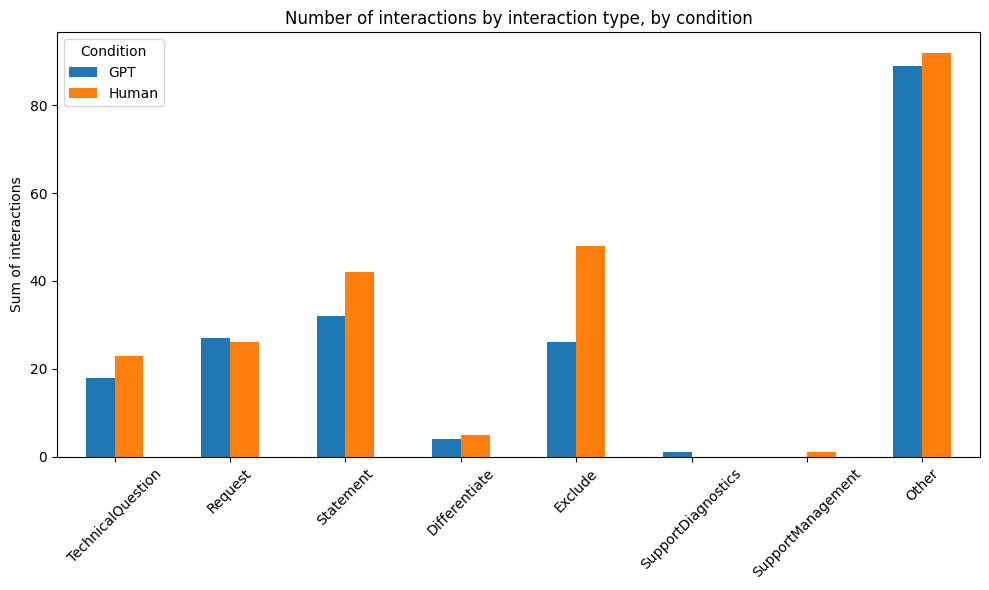

In [ ]:
df = pd.DataFrame(df)
selected_columns = ['Condition','TechnicalQuestion', 'Request', 'Statement', 'Differentiate', 'Exclude', 'SupportDiagnostics', 'SupportManagement','Other']  # Replace with desired column names

sum_replies = df[selected_columns]

grouped_sum = sum_replies.groupby('Condition').sum()
# Transpose the data to have categories on x-axis and genders as separate bars
grouped_sum = grouped_sum.T  # Transpose so categories are on x-axis

# Plotting
grouped_sum.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Number of interactions by interaction type, by condition')
plt.xlabel('')
plt.ylabel('Sum of interactions')
plt.xticks(rotation=45)
plt.legend(title='Condition')
plt.tight_layout()

# Show the plot
plt.show()




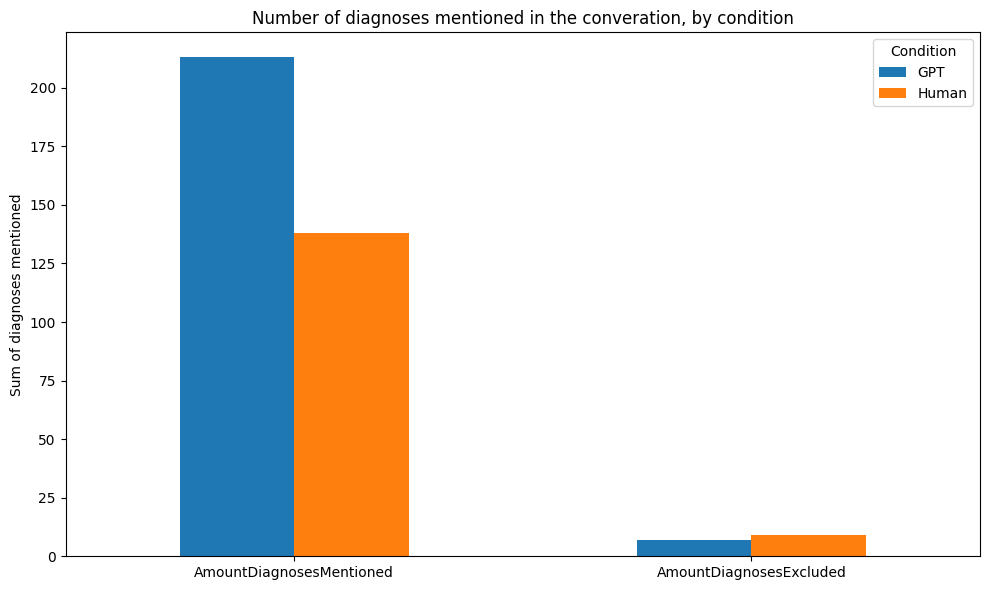

In [ ]:
selected_columns = ['Condition','AmountDiagnosesMentioned', 'AmountDiagnosesExcluded']  # Replace with desired column names

sum_replies = df[selected_columns]
grouped_sum = sum_replies.groupby('Condition').sum()
# Transpose the data to have categories on x-axis and genders as separate bars
grouped_sum = grouped_sum.T  # Transpose so categories are on x-axis

# Plotting
grouped_sum.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Number of diagnoses mentioned in the converation, by condition')
plt.xlabel('')
plt.ylabel('Sum of diagnoses mentioned')
plt.xticks(rotation=0)
plt.legend(title='Condition')
plt.tight_layout()

# Show the plot
plt.show()


## Unsupervised Machine Learning Methods

### K-means

In [ ]:
#libraries
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
#Create a dataframe with the necessary variables
clustering_df = df[['Count', 'Condition', 'AmountPatientRatio', 'TimePatientSeconds', 'TechnicalQuestion', 'Request', 'Statement', 'Differentiate', 'Exclude', 'FirstQuestionSelf', 'AmountDiagnosesMentioned', 'DurationInteractionSeconds', 'AmountInteraction']]

#Create a binary column for the variable 'Condition' 
#1 = ChatGPT, 0 = Human expert
clustering_df['Condition'] = clustering_df['Condition'].apply(lambda x: 1 if x == "GPT" else 0)

print(clustering_df)

    Count  Condition  AmountPatientRatio  TimePatientSeconds  \
0       1          1            1.000000                 202   
1       2          1            1.000000                 114   
2       3          1            0.166667                 191   
3       4          1            0.166667                 104   
4       5          0            0.166667                 111   
5       6          0            0.333333                 205   
6       7          0            0.500000                 201   
7       8          0            0.833333                 182   
8       9          1            0.166667                 100   
9      10          1            1.000000                 358   
10     11          0            0.833333                 464   
11     12          0            0.833333                 576   
12     13          0            0.333333                 185   
13     14          0            0.500000                 159   
14     15          0            0.833333

C:\Users\ms20s658\AppData\Local\Temp\ipykernel_31912\3458393593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df['Condition'] = clustering_df['Condition'].apply(lambda x: 1 if x == "GPT" else 0)


In [ ]:
#Create two subsets for each condition
clustering_gpt = clustering_df[clustering_df['Condition'] == 1]
clustering_human = clustering_df[clustering_df['Condition'] == 0]

#Check if it worked
#clustering_gpt.head()
#clustering_human.head()

,Count,Condition,AmountPatientRatio,TimePatientSeconds,TechnicalQuestion,Request,Statement,Differentiate,Exclude,FirstQuestionSelf,AmountDiagnosesMentioned,DurationInteractionSeconds,AmountInteraction
4,5,0,0.166667,111,0,2,2,0,3,0,7,1041,28
5,6,0,0.333333,205,0,1,4,0,1,0,9,731,28
6,7,0,0.500000,201,0,1,1,0,3,1,3,1183,28
7,8,0,0.833333,182,1,0,1,0,4,1,2,651,15
10,11,0,0.833333,464,1,0,0,0,0,1,0,695,6


Use of the elbow method to find the optimal number of clusters:

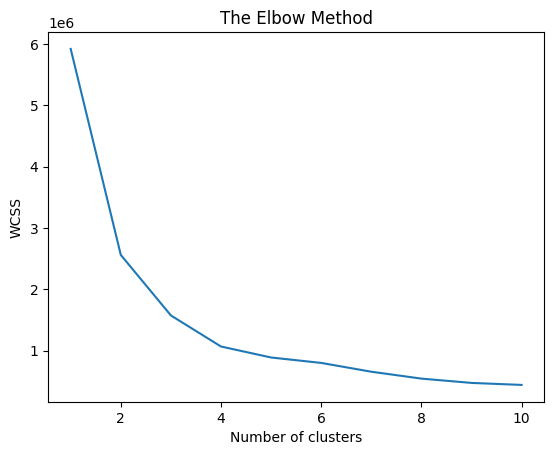

In [ ]:
# K-Means++ initialization for the elbow method:
# Instead of randomly placing centroids, K-Means++ selects them strategically:
# 1. The first centroid is chosen randomly from the data points.
# 2. For each remaining centroid, the algorithm selects a point farthest from the existing centroids.
#    This spreads out the centroids across the dataset.
# 3. After initializing the centroids, K-Means proceeds with clustering as usual.
# K-Means++ improves the clustering efficiency and helps get better results when using techniques
# like the Elbow Method to find the optimal number of clusters.
wcss = []
for i in range(1, 11): # we'll do it for 10 clusters to find the optimal number of clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(clustering_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number of clusters is **4**. We can see visually that with a number of clusters of 4, the descent of the WCSS value is reducing its descent.

Let's now train the model with this number of clusters:

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(clustering_df)

Explanation of `y_kmeans`:

The `y_kmeans` variable contains the classification in a cluster of the participant / user.

For example, participant 1 is in cluster 2, participant 2 is in cluster 1 and participant 3 is in cluster 2.

In [ ]:
#print(clustering_df.head())
y_kmeans

array([2, 2, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 2, 1, 1, 3, 0, 1, 2], dtype=int32)

Apply a PCA to reduce the dimensionality: 

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(clustering_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

#### Visualization of the results

In a next step, let's visualize the clusters: 

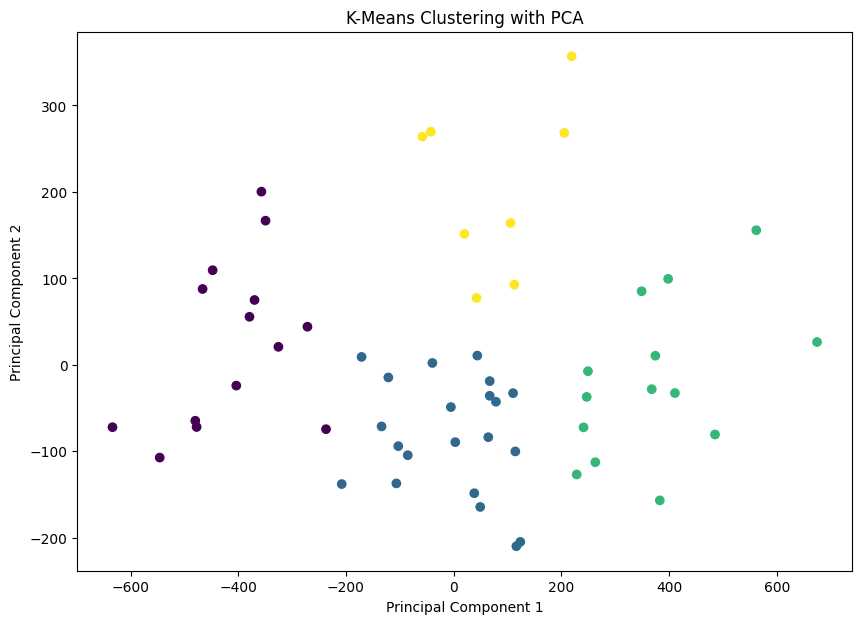

In [ ]:
labels = kmeans.labels_

plt.figure(figsize=(10, 7))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()

To further understand and interpret the clusters, let's have a look at the distribution of the values for each cluster: 

In [ ]:
# Group the data by cluster and calculate the mean of each feature
clustering_df['cluster'] = y_kmeans #Die Meldung im Output mit "Try using .loc... bezieht sich auf diesen Codeteil. Ich bin mir jedoch nicht ganz sicher, wie wir es anders zusammenfügen können, damit die Meldung im Output nicht mehr kommt. Evtl. hasst du eine Idee?
df_grouped = clustering_df.groupby('cluster').mean()

#Filter the DataFrame for each cluster 
cluster1_data = clustering_df[clustering_df['cluster'] == 0] 
cluster2_data = clustering_df[clustering_df['cluster'] == 1] 
cluster3_data = clustering_df[clustering_df['cluster'] == 2] 
cluster4_data = clustering_df[clustering_df['cluster'] == 3] 

#Calculate the mean of each feature for each cluster 
cluster1_mean = cluster1_data.mean()
cluster2_mean = cluster2_data.mean()
cluster3_mean = cluster3_data.mean()
cluster4_mean = cluster4_data.mean()

# Create a Markdown table string
table_md1 = f"""
| Feature | Mean value for cluster 1 | Mean value for cluster 2 | Mean value for cluster 3 | Mean value for cluster 4 |
|---|---|---|---|---|
| Condition | **{cluster1_mean['Condition']:.2f}** | {cluster2_mean['Condition']:.2f} | **{cluster3_mean['Condition']:.2f}** | {cluster4_mean['Condition']:.2f} |
| Ratio of patient information | {cluster1_mean['AmountPatientRatio']:.2f} | **{cluster2_mean['AmountPatientRatio']:.2f}** | {cluster3_mean['AmountPatientRatio']:.2f} | **{cluster4_mean['AmountPatientRatio']:.2f}** |
| Time of patient information (in seconds) | {cluster1_mean['TimePatientSeconds']:.2f} | **{cluster2_mean['TimePatientSeconds']:.2f}** | {cluster3_mean['TimePatientSeconds']:.2f} | **{cluster4_mean['TimePatientSeconds']:.2f}** |
| Q-type: Technical question | {cluster1_mean['TechnicalQuestion']:.2f} | {cluster2_mean['TechnicalQuestion']:.2f} | **{cluster3_mean['TechnicalQuestion']:.2f}** | {cluster4_mean['TechnicalQuestion']:.2f} |
| Q-type: Request | {cluster1_mean['Request']:.2f} | **{cluster2_mean['Request']:.2f}** | {cluster3_mean['Request']:.2f} | {cluster4_mean['Request']:.2f} |
| Q-type: Statement | {cluster1_mean['Statement']:.2f} | {cluster2_mean['Statement']:.2f} | **{cluster3_mean['Statement']:.2f}** | {cluster4_mean['Statement']:.2f} |
| Q-type: Differentiate | {cluster1_mean['Differentiate']:.2f} | {cluster2_mean['Differentiate']:.2f} | {cluster3_mean['Differentiate']:.2f} | **{cluster4_mean['Differentiate']:.2f}** |
| Q-type: Exclude | {cluster1_mean['Exclude']:.2f} | {cluster2_mean['Exclude']:.2f} | **{cluster3_mean['Exclude']:.2f}** | {cluster4_mean['Exclude']:.2f} |
| First question was self-formulated (and not copied) | {cluster1_mean['FirstQuestionSelf']:.2f} | {cluster2_mean['FirstQuestionSelf']:.2f} | {cluster3_mean['FirstQuestionSelf']:.2f} | {cluster4_mean['FirstQuestionSelf']:.2f} |
| Amount of mentioned diagnoses | **{cluster1_mean['AmountDiagnosesMentioned']:.2f}** | **{cluster2_mean['AmountDiagnosesMentioned']:.2f}** | {cluster3_mean['AmountDiagnosesMentioned']:.2f} | {cluster4_mean['AmountDiagnosesMentioned']:.2f} |
| Duration of the total chat interaction (in seconds) | **{cluster1_mean['DurationInteractionSeconds']:.2f}** | {cluster2_mean['DurationInteractionSeconds']:.2f} | **{cluster3_mean['DurationInteractionSeconds']:.2f}** | {cluster4_mean['DurationInteractionSeconds']:.2f} |
| Amount of interactions in the chat | **{cluster1_mean['AmountInteraction']:.2f}** | {cluster2_mean['AmountInteraction']:.2f} | **{cluster3_mean['AmountInteraction']:.2f}** | {cluster4_mean['AmountInteraction']:.2f} | 
"""

# Display Table
display(Markdown(table_md1))

C:\Users\ms20s658\AppData\Local\Temp\ipykernel_31912\1258449691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_df['cluster'] = y_kmeans #Die Meldung im Output mit "Try using .loc... bezieht sich auf diesen Codeteil. Ich bin mir jedoch nicht ganz sicher, wie wir es anders zusammenfügen können, damit die Meldung im Output nicht mehr kommt. Evtl. hasst du eine Idee?



| Feature | Mean value for cluster 1 | Mean value for cluster 2 | Mean value for cluster 3 | Mean value for cluster 4 |
|---|---|---|---|---|
| Condition | **0.79** | 0.57 | **0.29** | 0.38 |
| Ratio of patient information | 0.64 | **0.41** | 0.62 | **0.83** |
| Time of patient information (in seconds) | 201.00 | **123.48** | 211.36 | **415.25** |
| Q-type: Technical question | 0.50 | 0.76 | **1.14** | 0.25 |
| Q-type: Request | 0.71 | **1.19** | 1.07 | 0.38 |
| Q-type: Statement | 0.14 | 1.86 | **2.00** | 0.62 |
| Q-type: Differentiate | 0.07 | 0.19 | 0.14 | **0.25** |
| Q-type: Exclude | 0.36 | 1.67 | **2.14** | 0.50 |
| First question was self-formulated (and not copied) | 0.71 | 0.76 | 0.79 | 0.75 |
| Amount of mentioned diagnoses | **3.14** | **8.00** | 7.50 | 4.25 |
| Duration of the total chat interaction (in seconds) | **360.14** | 771.67 | **1145.00** | 832.12 |
| Amount of interactions in the chat | **4.71** | 25.48 | **28.07** | 13.62 | 


#### Interpretation


* Cluster 1 - Quickies (or low intensity chat user)
    * The group that did use the chat the least (lowest duration of chat interaction and amount of chat interactions among all clusters)
    * Subsequently, the group that generated the lowest amount of differential diagnoses

* Cluster 2 - Generate me solutions, please! (or low informer and high requester)
    * The group that contains users who did not inform themselves before interacting in the chat (lowest values for ratio and time of patient information acquisition prior to entering the chat)
    * During the interaction they request the generation of diagnoses (highest value for Q-type: Request) to have a palette of diagnoses (highest amount of generated diagnoses among all clusters)

* Cluster 3 - Novice chatterbox (or high intensity chat user with low expert knowledge in the medical field)
    * The group that did use the chat the most (highest duration of chat interaction and amount of chat interactions among all clusters)
    * In the chat interaction, they mostly ask technical questions to close their knowledge gap (highest value for Q-type: Technical question). They also make the most statements (highest value for Q-type: Statement), but this is probably because of additional information or the interaction for the technical questions.
    * They also asked the most questions to exclude diagnoses (highest value for Q-type: Exclude). The information gained from the technical questions could possibly be used to then exclude diagnoses they thought of.

* Cluster 4 - Help me to get my ideas straight (or high informer and high differentiater)
    * The group with users who did inform themselves a lot about the patient case before interacting in the chat (highest values for ratio and time of patient information acquisition prior to entering the chat)
    * With this, they built themselves an image about the situation and had already a list of diagnoses in mind. Then, during the chat interaction, they asked questions to differentiate multiple diagnoses from each other (highest value for Q-type: Differentiate)


Condition ChatGPT vs. Human expert
* It is noticeable that cluster 1 and 2 contain participants who had in a majority ChatGPT as their interaction partner and cluster 3 and 4, on the other hand, contain mostly participants with a human expert as their chat partner.
* The clusters seem to differentiate between the conditions. Therefore, it makes sense to do an additonal clustering for each condition separately and to compare the results.

### K-means for the condition ChatGPT

Use of the elbow method to find the optimal number of clusters:

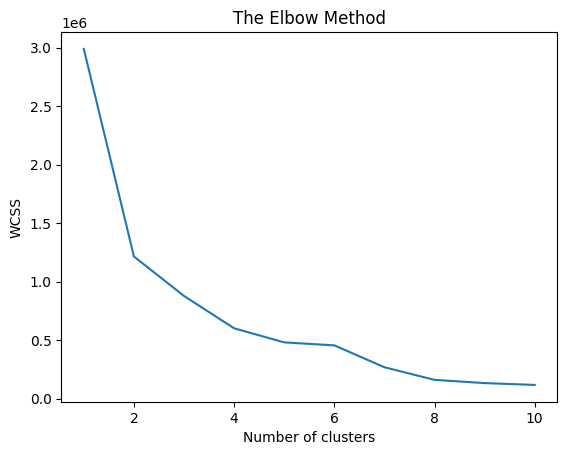

In [ ]:
wcss = []
for i in range(1, 11): # we'll do it for 10 clusters to find the optimal number of clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(clustering_gpt)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number of clusters is **4**. *- Salomé, was meinst du hier? Ist es 4 oder doch eine andere Anzahl Cluster?*

Train the model with this number of clusters:

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(clustering_gpt)

PCA to reduce the dimensionality: 

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(clustering_gpt)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

#### Visualization of the results

Visualization of the clusters: 

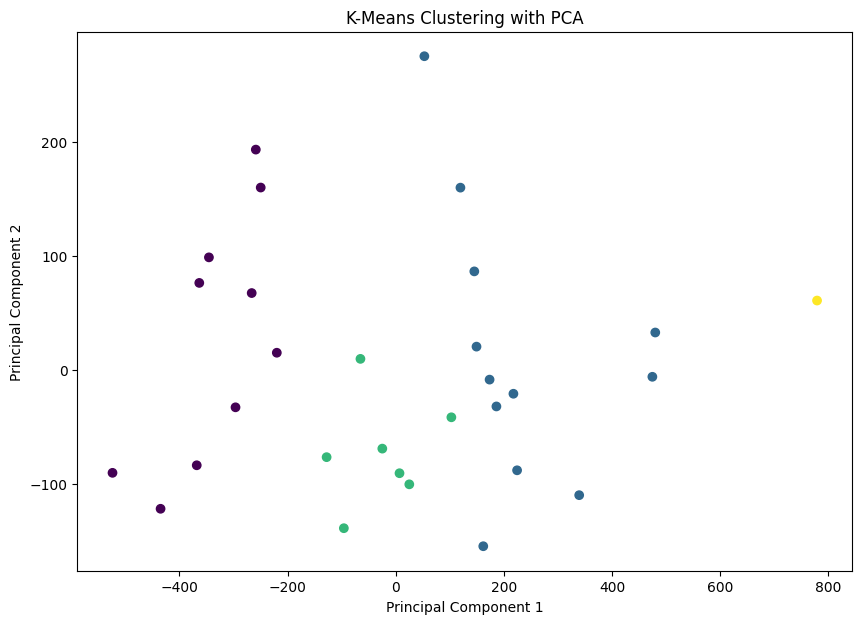

In [ ]:
labels = kmeans.labels_

plt.figure(figsize=(10, 7))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()

Distribution of the values for each cluster: 

In [ ]:
# Group the data by cluster and calculate the mean of each feature
clustering_gpt['cluster'] = y_kmeans #Die Meldung im Output mit "Try using .loc... bezieht sich auf diesen Codeteil. Ich bin mir jedoch nicht ganz sicher, wie wir es anders zusammenfügen können, damit die Meldung im Output nicht mehr kommt. Evtl. hasst du eine Idee?
df_grouped = clustering_gpt.groupby('cluster').mean()

#Filter the DataFrame for each cluster 
cluster1_data = clustering_gpt[clustering_gpt['cluster'] == 0] 
cluster2_data = clustering_gpt[clustering_gpt['cluster'] == 1] 
cluster3_data = clustering_gpt[clustering_gpt['cluster'] == 2] 
cluster4_data = clustering_gpt[clustering_gpt['cluster'] == 3] 

#Calculate the mean of each feature for each cluster 
cluster1_mean = cluster1_data.mean()
cluster2_mean = cluster2_data.mean()
cluster3_mean = cluster3_data.mean()
cluster4_mean = cluster4_data.mean()

# Create a Markdown table string
table_md1 = f"""
| Feature | Mean value for cluster 1 | Mean value for cluster 2 | Mean value for cluster 3 | Mean value for cluster 4 |
|---|---|---|---|---|
| Ratio of patient information | {cluster1_mean['AmountPatientRatio']:.2f} | {cluster2_mean['AmountPatientRatio']:.2f} | **{cluster3_mean['AmountPatientRatio']:.2f}** | **{cluster4_mean['AmountPatientRatio']:.2f}** |
| Time of patient information (in seconds) | {cluster1_mean['TimePatientSeconds']:.2f} | {cluster2_mean['TimePatientSeconds']:.2f} | **{cluster3_mean['TimePatientSeconds']:.2f}** | **{cluster4_mean['TimePatientSeconds']:.2f}** |
| Q-type: Technical question | {cluster1_mean['TechnicalQuestion']:.2f} | {cluster2_mean['TechnicalQuestion']:.2f} | **{cluster3_mean['TechnicalQuestion']:.2f}** | {cluster4_mean['TechnicalQuestion']:.2f} |
| Q-type: Request | {cluster1_mean['Request']:.2f} | {cluster2_mean['Request']:.2f} | **{cluster3_mean['Request']:.2f}** | {cluster4_mean['Request']:.2f} |
| Q-type: Statement | {cluster1_mean['Statement']:.2f} | {cluster2_mean['Statement']:.2f} | {cluster3_mean['Statement']:.2f} | **{cluster4_mean['Statement']:.2f}** |
| Q-type: Differentiate | {cluster1_mean['Differentiate']:.2f} | **{cluster2_mean['Differentiate']:.2f}** | {cluster3_mean['Differentiate']:.2f} | {cluster4_mean['Differentiate']:.2f} |
| Q-type: Exclude | {cluster1_mean['Exclude']:.2f} | {cluster2_mean['Exclude']:.2f} | **{cluster3_mean['Exclude']:.2f}** | {cluster4_mean['Exclude']:.2f} |
| First question was self-formulated (and not copied) | {cluster1_mean['FirstQuestionSelf']:.2f} | {cluster2_mean['FirstQuestionSelf']:.2f} | {cluster3_mean['FirstQuestionSelf']:.2f} | {cluster4_mean['FirstQuestionSelf']:.2f} |
| Amount of mentioned diagnoses | **{cluster1_mean['AmountDiagnosesMentioned']:.2f}** | {cluster2_mean['AmountDiagnosesMentioned']:.2f} | {cluster3_mean['AmountDiagnosesMentioned']:.2f} | **{cluster4_mean['AmountDiagnosesMentioned']:.2f}** |
| Duration of the total chat interaction (in seconds) | **{cluster1_mean['DurationInteractionSeconds']:.2f}** | {cluster2_mean['DurationInteractionSeconds']:.2f} | {cluster3_mean['DurationInteractionSeconds']:.2f} | **{cluster4_mean['DurationInteractionSeconds']:.2f}** |
| Amount of interactions in the chat | **{cluster1_mean['AmountInteraction']:.2f}** | {cluster2_mean['AmountInteraction']:.2f} | {cluster3_mean['AmountInteraction']:.2f} | **{cluster4_mean['AmountInteraction']:.2f}** | 
"""

# Display Table
display(Markdown(table_md1))

ValueError: Length of values (27) does not match length of index (30)

#### Interpretation


* Cluster 1 - Low performer
    * The group that did use the chat the least (lowest duration of chat interaction and amount of chat interactions among all clusters) and that generated the lowest amount of diagnoses  

* Cluster 2 - Differentiater
    * The group that asked the most questions to differentiate between two or more differential diagnoses (highest values for Q-type: Differentiate)
    * Otherwise they are average users / perfomers (no peak values in the other categories)

* Cluster 3 - I know nothing, please do everyting for me! (or low informer and high requester as well as excluder)
    * The group that contains users who did not inform themselves before interacting in the chat (lowest values for ratio and time of patient information acquisition prior to entering the chat)
    * In the chat interaction, they theny mostly ask technical questions to close their knowledge gap (highest value for Q-type: Technical question). They also ask the most requests to ChatGPT to generate diagnoses (highest value for Q-type: Request), and additionally ask the most questions to exclude diagnoses (highest value for Q-type: Exclude). Basically, they ask ChatGPT to generate them diagnoses and then want ChatGPT to reduce the amount of target diagnoes by excluding differential diagnoses.
    * This cluster is to some extent similar to cluster 2 in the overall model 

* Cluster 4 - High performer
    * This cluster has to be treated carefully, since it contains only 1 data point. 
    * The group that did inform themselves the most (highest values for patient information acquisition variables), use the chat the most (highest duration of chat interaction and amount of chat interactions among all clusters), and also generated the highest amount of diagnoses  
    * In addition, they made the most statements during the chat interaction (highest value for Q-type: Statement)


### K-means for the condition Human expert

Use of the elbow method to find the optimal number of clusters:

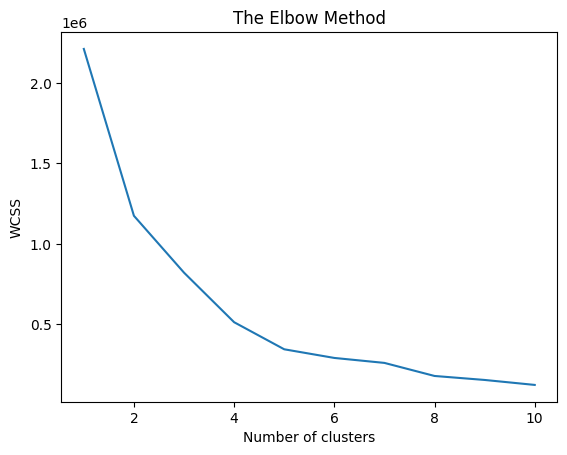

In [ ]:
wcss = []
for i in range(1, 11): # we'll do it for 10 clusters to find the optimal number of clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(clustering_human)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number of clusters is **5**.

Train the model with this number of clusters:

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(clustering_human)

PCA to reduce the dimensionality: 

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(clustering_human)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

#### Visualization of the results

Visualization of the clusters: 

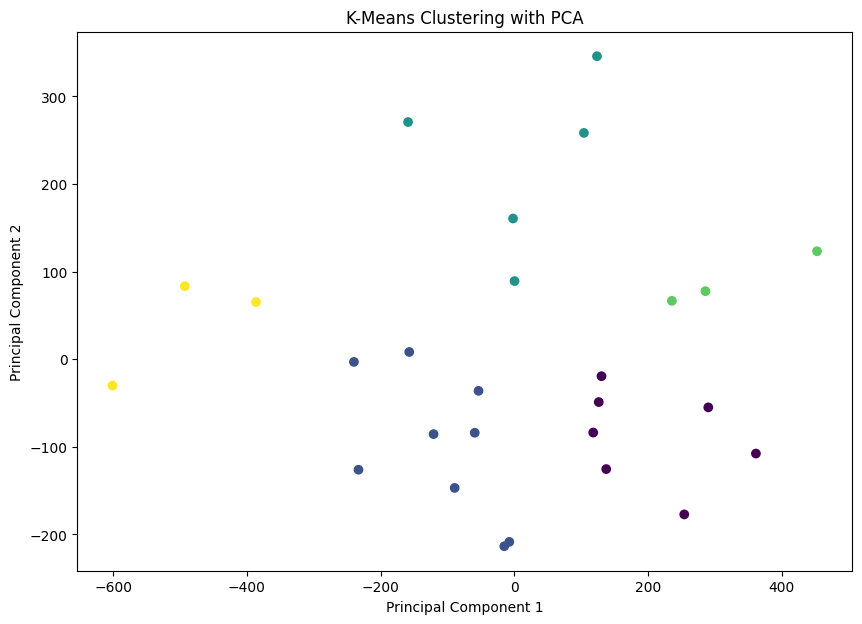

In [ ]:
labels = kmeans.labels_

plt.figure(figsize=(10, 7))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()

Distribution of the values for each cluster: 

In [ ]:
# Group the data by cluster and calculate the mean of each feature
clustering_human['cluster'] = y_kmeans #Die Meldung im Output mit "Try using .loc... bezieht sich auf diesen Codeteil. Ich bin mir jedoch nicht ganz sicher, wie wir es anders zusammenfügen können, damit die Meldung im Output nicht mehr kommt. Evtl. hasst du eine Idee?
df_grouped = clustering_human.groupby('cluster').mean()

#Filter the DataFrame for each cluster 
cluster1_data = clustering_human[clustering_human['cluster'] == 0] 
cluster2_data = clustering_human[clustering_human['cluster'] == 1] 
cluster3_data = clustering_human[clustering_human['cluster'] == 2] 
cluster4_data = clustering_human[clustering_human['cluster'] == 3]
cluster5_data = clustering_human[clustering_human['cluster'] == 4] 

#Calculate the mean of each feature for each cluster 
cluster1_mean = cluster1_data.mean()
cluster2_mean = cluster2_data.mean()
cluster3_mean = cluster3_data.mean()
cluster4_mean = cluster4_data.mean()
cluster5_mean = cluster5_data.mean()

# Create a Markdown table string
table_md1 = f"""
| Feature | Mean value for cluster 1 | Mean value for cluster 2 | Mean value for cluster 3 | Mean value for cluster 4 | Mean value for cluster 5 |
|---|---|---|---|---|---|
| Ratio of patient information | {cluster1_mean['AmountPatientRatio']:.2f} | **{cluster2_mean['AmountPatientRatio']:.2f}** | **{cluster3_mean['AmountPatientRatio']:.2f}** | {cluster4_mean['AmountPatientRatio']:.2f} | {cluster5_mean['AmountPatientRatio']:.2f} |
| Time of patient information (in seconds) | {cluster1_mean['TimePatientSeconds']:.2f} | **{cluster2_mean['TimePatientSeconds']:.2f}** | **{cluster3_mean['TimePatientSeconds']:.2f}** | {cluster4_mean['TimePatientSeconds']:.2f} | {cluster5_mean['TimePatientSeconds']:.2f} |
| Q-type: Technical question | {cluster1_mean['TechnicalQuestion']:.2f} | {cluster2_mean['TechnicalQuestion']:.2f} | **{cluster3_mean['TechnicalQuestion']:.2f}** | **{cluster4_mean['TechnicalQuestion']:.2f}** | {cluster5_mean['TechnicalQuestion']:.2f} |
| Q-type: Request | **{cluster1_mean['Request']:.2f}** | {cluster2_mean['Request']:.2f} | {cluster3_mean['Request']:.2f} | {cluster4_mean['Request']:.2f} | {cluster5_mean['Request']:.2f} |
| Q-type: Statement | {cluster1_mean['Statement']:.2f} | {cluster2_mean['Statement']:.2f} | {cluster3_mean['Statement']:.2f} | **{cluster4_mean['Statement']:.2f}** | {cluster5_mean['Statement']:.2f} |
| Q-type: Differentiate | {cluster1_mean['Differentiate']:.2f} | {cluster2_mean['Differentiate']:.2f} | **{cluster3_mean['Differentiate']:.2f}** | {cluster4_mean['Differentiate']:.2f} | {cluster5_mean['Differentiate']:.2f} |
| Q-type: Exclude | **{cluster1_mean['Exclude']:.2f}** | {cluster2_mean['Exclude']:.2f} | {cluster3_mean['Exclude']:.2f} | {cluster4_mean['Exclude']:.2f} | {cluster5_mean['Exclude']:.2f} |
| First question was self-formulated (and not copied) | {cluster1_mean['FirstQuestionSelf']:.2f} | {cluster2_mean['FirstQuestionSelf']:.2f} | {cluster3_mean['FirstQuestionSelf']:.2f} | {cluster4_mean['FirstQuestionSelf']:.2f} | {cluster5_mean['FirstQuestionSelf']:.2f} |
| Amount of mentioned diagnoses | **{cluster1_mean['AmountDiagnosesMentioned']:.2f}** | {cluster2_mean['AmountDiagnosesMentioned']:.2f} | {cluster3_mean['AmountDiagnosesMentioned']:.2f} | {cluster4_mean['AmountDiagnosesMentioned']:.2f} | **{cluster5_mean['AmountDiagnosesMentioned']:.2f}** |
| Duration of the total chat interaction (in seconds) | {cluster1_mean['DurationInteractionSeconds']:.2f} | {cluster2_mean['DurationInteractionSeconds']:.2f} | {cluster3_mean['DurationInteractionSeconds']:.2f} | **{cluster4_mean['DurationInteractionSeconds']:.2f}** | **{cluster5_mean['DurationInteractionSeconds']:.2f}** |
| Amount of interactions in the chat | {cluster1_mean['AmountInteraction']:.2f} | **{cluster2_mean['AmountInteraction']:.2f}** | {cluster3_mean['AmountInteraction']:.2f} | {cluster4_mean['AmountInteraction']:.2f} | **{cluster5_mean['AmountInteraction']:.2f}** | 
"""

# Display Table
display(Markdown(table_md1))

C:\Users\ms20s658\AppData\Local\Temp\ipykernel_31912\2244020705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_human['cluster'] = y_kmeans #Die Meldung im Output mit "Try using .loc... bezieht sich auf diesen Codeteil. Ich bin mir jedoch nicht ganz sicher, wie wir es anders zusammenfügen können, damit die Meldung im Output nicht mehr kommt. Evtl. hasst du eine Idee?



| Feature | Mean value for cluster 1 | Mean value for cluster 2 | Mean value for cluster 3 | Mean value for cluster 4 | Mean value for cluster 5 |
|---|---|---|---|---|---|
| Ratio of patient information | 0.50 | **0.33** | **0.87** | 0.61 | 0.39 |
| Time of patient information (in seconds) | 156.71 | **104.56** | **441.60** | 348.67 | 190.33 |
| Q-type: Technical question | 1.00 | 1.00 | **0.40** | **1.67** | 0.00 |
| Q-type: Request | **1.43** | 1.00 | 0.20 | 1.33 | 0.67 |
| Q-type: Statement | 2.14 | 1.78 | 0.60 | **2.33** | 0.33 |
| Q-type: Differentiate | 0.29 | 0.11 | **0.40** | 0.00 | 0.00 |
| Q-type: Exclude | **3.29** | 2.11 | 0.20 | 1.00 | 0.67 |
| First question was self-formulated (and not copied) | 0.71 | 0.78 | 1.00 | 1.00 | 1.00 |
| Amount of mentioned diagnoses | **7.29** | 5.44 | 3.20 | 5.33 | **2.00** |
| Duration of the total chat interaction (in seconds) | 1100.43 | 793.67 | 871.80 | **1198.00** | **394.33** |
| Amount of interactions in the chat | 31.14 | **31.44** | 12.20 | 27.67 | **5.00** | 


#### Interpretation


* Cluster 1 - Requester and Excluder
    * The group that requested the most differential diagnoses (highest value for Q-type: Request) to the human and at the same time also asked them questions to exclude diagnoses (highest value for Q-type: Exclude)
    * This group is similar to cluster 3 of the ChatGPT model and similar to cluster 2 of the overall model 

* Cluster 2 - Low informer but high interacter
    * The group that informed themselves the least about the patient case prior to initiating the chat interaction (lowest values for ratio and time of patient information acquisition prior to entering the chat)
    * But they then wrote the most messages to the human expert (highest amount of chat interactions among all clusters)

* Cluster 3 - High informer, experts and differentiater
    * The group that contains users who did inform themselves thoroughly before interacting in the chat (higest values for patient information acquisition variables)
    * They did not only know the most about the patient case, but also about the medical field in general - since they asked the least technical questions in the chat. This could be an indication for a group of people who like to internalize knowledge, being it on the patient case or on medical knowledge in general.
    * With their expert knowledge, they mostly asked questions in the chat that helped them to differentiate existing ideas and diagnoses they generated themselves (highest value for Q-type: Differentiate) 

* Cluster 4 - Encyclopedia
    * People in this group asked mostly technical questions to close their knowledge gap (highest value for Q-type: Technical question). They also make the most statements (highest value for Q-type: Statement). This is probably because of additional information or the interaction for the technical questions.
    * Connected to this, people in this cluster had the longest chat interaction (longest duration of chat interaction in seconds), even tough they did not write the most messages back and forth (not the highest amount of chat interactions). This makes sense, since asking technical questions (as well as reading/understanding the answers) and giving information for them requires some time.
    * This cluster is similar to cluster 3 of the overall model. 

* Cluster 5 - Low performer
    * This group shows the lowest values for the chat interaction variables (i.e., duration and amount of chat interactions) and in addition has the lowest amount of generated diagnoses.
    * Therefore, people in this group did use the chat the least.
    * With this, the cluster is similar to cluster 1 of the ChatGPT model.


Conclusion
* Some clusters regarding the human expert are similar to chatgpt, but some others are different. 
* There seems to be some influence of the chat partner when it comes to different groups of chat users. But at the same time, some groups of users are consistent, even with differing chat partner.
* Further data can help to support this assumption. That additional data will be available and provided in the near future.

### Further models, other than K-means

Weitere Modelle, die wir umsetzen könnten... 
Ich habe dazu diese Grafik in meinen Vorlesungsunterlagen gefunden, da kann man die PCA anschauen und je nachdem welches Clustering-Modell man wählt, generiert es die Cluster nach einem anderen Pattern -> Man kann also beim PCA (in unserem Fall das PCA des allgemeinen Modells) schauen, welches Pattern geeignet wäre für die Verteilung der Punkte und so ein Clustering-Modell auswählen.

--> Als Idee beispielsweise DBSCAN oder die GaussianMixture? Was meinst du? Ich bin offen für alles :)

![Different Clustering Models](DifferentClusteringModels.jpg)